In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/processed/probability_of_default.csv")

In [3]:
df.head()

,age,income,home_ownership_type,employment_length,loan_amount,loan_interest_rate,is_default,loan_to_income_ratio,has_defaulted_before,credit_history_length,debt_to_stability_ratio
0,21,9600,OWN,5.0,1000,11.14,0,0.10,0,2,0.0484
1,25,9600,MORTGAGE,1.0,5500,12.87,1,0.57,0,3,0.7514
2,23,65500,RENT,4.0,35000,15.23,1,0.53,0,2,0.3320
3,24,54400,RENT,8.0,35000,14.27,1,0.55,1,4,0.2928
4,21,9900,OWN,2.0,2500,7.14,1,0.25,0,2,0.1915


/tmp/ipykernel_55122/1049513969.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=target_corr_df, x="correlation_default", y="feature", palette="coolwarm")


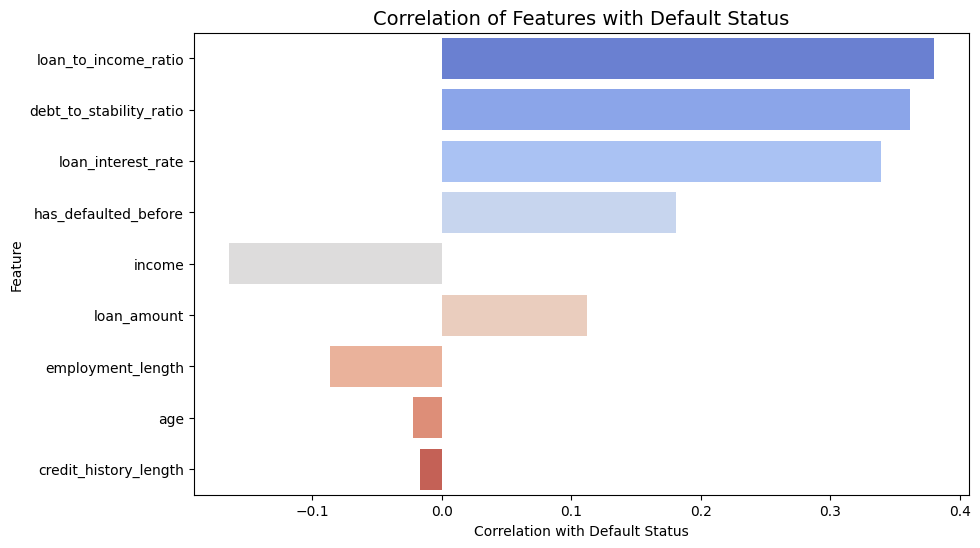

,feature,correlation_default
0,loan_to_income_ratio,0.379823
1,debt_to_stability_ratio,0.361452
2,loan_interest_rate,0.339307
3,has_defaulted_before,0.181090
4,income,-0.164128
5,loan_amount,0.112188
6,employment_length,-0.085966
7,age,-0.022130
8,credit_history_length,-0.016830


In [4]:
# Calculate correlation of 'is_default' with all other variables
target_corr = df.select_dtypes(exclude='object').corr()["is_default"].drop("is_default").sort_values(key=abs, ascending=False)

# Reorganize into a DataFrame for visualization
target_corr_df = target_corr.reset_index()
target_corr_df.columns = ["feature", "correlation_default"]

# Plot bar chart with correlation values
plt.figure(figsize=(10, 6))
sns.barplot(data=target_corr_df, x="correlation_default", y="feature", palette="coolwarm")
plt.title("Correlation of Features with Default Status", fontsize=14)
plt.xlabel("Correlation with Default Status")
plt.ylabel("Feature")
plt.grid(False)
plt.show()

# Display the main insights as a table
target_corr_df

/tmp/ipykernel_55122/537348183.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["interest_rate_bin"] = pd.cut(df_filtered["loan_interest_rate"], bins=20)
/tmp/ipykernel_55122/537348183.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interest_default = df_filtered.groupby("interest_rate_bin")["is_default"].mean().reset_index()


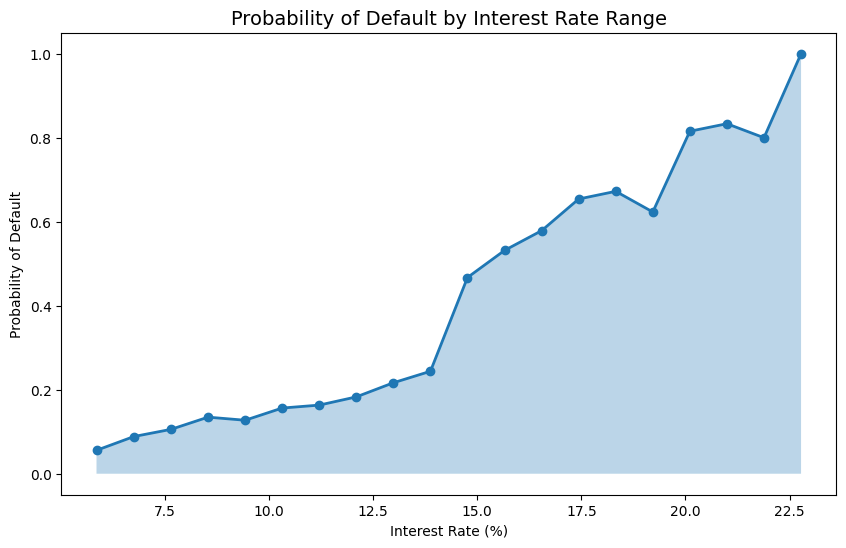

In [5]:
# Remove rows with null interest rates and create interest rate bins
df_filtered = df.dropna(subset=["loan_interest_rate"])
df_filtered["interest_rate_bin"] = pd.cut(df_filtered["loan_interest_rate"], bins=20)

# Calculate average default rate for each interest rate bin
interest_default = df_filtered.groupby("interest_rate_bin")["is_default"].mean().reset_index()
interest_default["midpoint"] = interest_default["interest_rate_bin"].apply(lambda x: x.mid)

# Convert to numeric arrays for plotting
x = interest_default["midpoint"].astype(float).values
y = interest_default["is_default"].astype(float).values

# Plot probability of default by interest rate range
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker="o", linewidth=2)
plt.fill_between(x, y, alpha=0.3)
plt.title("Probability of Default by Interest Rate Range", fontsize=14)
plt.xlabel("Interest Rate (%)")
plt.ylabel("Probability of Default")
plt.grid(False)
plt.show()

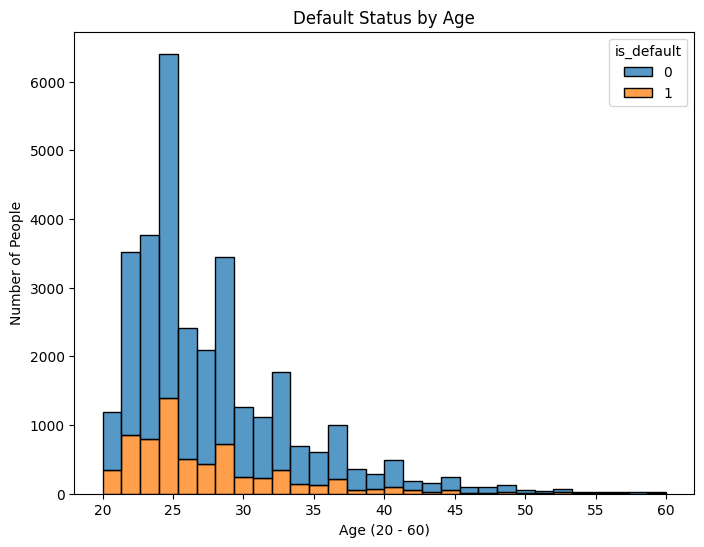

In [6]:
# 1. Age distribution by default status
fig1, ax1 = plt.subplots(figsize=(8, 6))
sns.histplot(data=df[df['age'] <= 60], x="age", hue="is_default", multiple="stack", bins=30, ax=ax1)
ax1.set_title("Default Status by Age")
ax1.set_ylabel("Number of People")
ax1.set_xlabel("Age (20 - 60)")
plt.show()

/tmp/ipykernel_55122/1161529079.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_graph['income_bin'] = pd.cut(df_graph['income'], bins=bins, right=False)
/tmp/ipykernel_55122/1161529079.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_bin_default_prob = df_graph.groupby('income_bin')['is_default'].mean().reset_index()


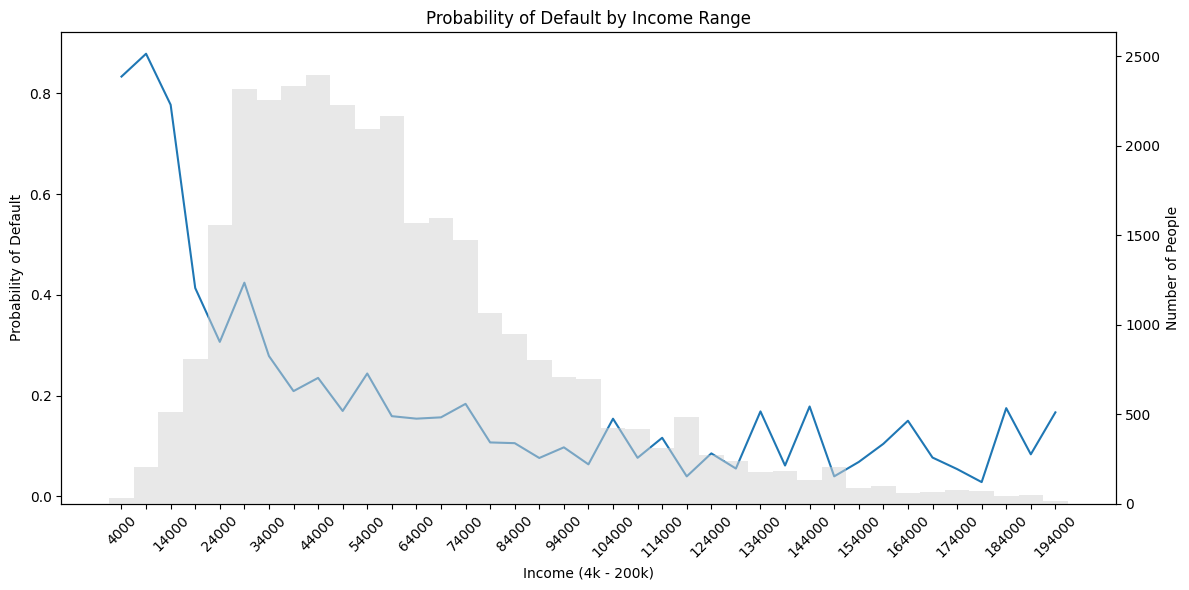

In [7]:
df_graph = df[df['income'] < 200000]

# Create income bins with 5k spacing
bins = range(df_graph['income'].min(), df_graph['income'].max() + 5000, 5000)
df_graph['income_bin'] = pd.cut(df_graph['income'], bins=bins, right=False)

# Calculate probability of default by income bin
income_bin_default_prob = df_graph.groupby('income_bin')['is_default'].mean().reset_index()

# Convert income_bin to string for plotting to avoid invalid object type error
income_bin_default_prob['income_bin'] = income_bin_default_prob['income_bin'].astype(str)

# Plot probability of default by income bin
fig2, ax2 = plt.subplots(figsize=(12, 6))
sns.lineplot(data=income_bin_default_prob, x='income_bin', y='is_default', ax=ax2)
ax2.set_title("Probability of Default by Income Range")
ax2.set_ylabel("Probability of Default")
ax2.set_xlabel("Income (4k - 200k)")
ax2.set_xticklabels([])

# Plot secondary bar plot for count of people in each income bin (background)
ax2b = ax2.twinx()
bin_counts = df_graph['income_bin'].value_counts().sort_index()
ax2b.bar(bin_counts.index.astype(str), bin_counts.values, color='lightgray', alpha=0.5, width=1, label='Number of People')
ax2b.set_ylabel("Number of People")
ax2b.set_ylim(0, bin_counts.values.max() * 1.1)
ax2b.grid(False)

# Show only every other label on the x-axis for better readability
labels = [b.split(',')[0].replace('[', '') for b in income_bin_default_prob['income_bin']]
ax2.set_xticks(range(len(labels)))
ax2.set_xticklabels([label if i % 2 == 0 else '' for i, label in enumerate(labels)], rotation=45)

plt.tight_layout()
plt.show()